In [1]:
!pip install wordcloud

In [52]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [100]:
df=pd.read_csv(r"C:\Users\HP\Downloads\EMAILS.csv")
df.head(5376)

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,Subject: naturally irresistible your corporate...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5371,"Subject: re : eprm 2001 houston layla , a fe...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5372,"Subject: re : copier on 32 nd floor kevin , ...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5373,Subject: fw : garp ny - minutes of the credit ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5374,Subject: benzene forward curve & hedge calcula...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [55]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [56]:
df.describe()

,text,spam
count,5730,5728
unique,5697,4
top,"Subject: re : contact info glenn , please , ...",0
freq,2,4358


In [57]:
df.count()

text    5730
spam    5728
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5730 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5730 non-null   object
 1   spam    5728 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB


In [59]:
df.isnull().sum()

text    0
spam    2
dtype: int64

In [60]:
import numpy as np
df['spam'] = df['spam'].replace(np.nan, 0)

In [61]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [62]:

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [66]:
df['processed_text']=df['text'].apply(preprocess_text)

In [72]:
df['spam'] = df['spam'].astype(str)

In [73]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['spam'])


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['spam'], test_size=0.2, random_state=42)

In [75]:
# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [76]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [77]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [78]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8760907504363001
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       856
           1       1.00      0.51      0.68       290

    accuracy                           0.88      1146
   macro avg       0.93      0.76      0.80      1146
weighted avg       0.89      0.88      0.86      1146



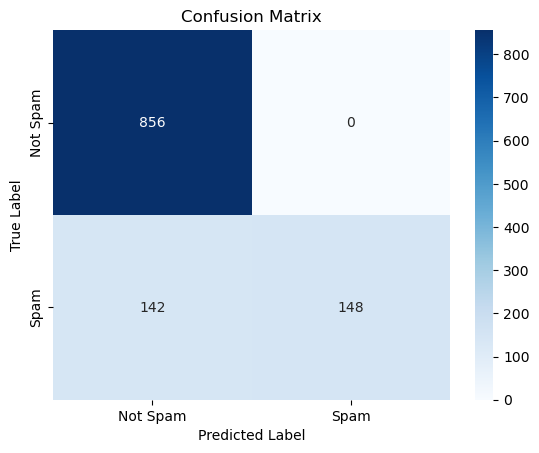

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [106]:
def predict_spam(email_text):
    preprocessed_text = preprocess_text(email_text)
    tfidf_text = tfidf_vectorizer.transform([preprocessed_text])
    prediction = nb_classifier.predict(tfidf_text)[0]
    return prediction

# Example usage
email_text = "re : eprm 2001 houston layla , a fe.."
prediction = predict_spam(email_text)
print("Prediction:", prediction)  

Prediction: 0
